<a href="https://colab.research.google.com/github/Tharun2234/BLOOD-CELL-CLASSIFICATION-USING-DEEP-LEARNING/blob/main/CNN_WBC_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import os
import zipfile


files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
print("Imported kaggle API successfully !")

Saving kaggle.json to kaggle.json
Imported kaggle API successfully !


In [ ]:
print("Downloading dataset : ")
!kaggle datasets download -d paultimothymooney/blood-cells
print("Downloaded Successfully!")

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/blood-cells
License(s): other
Downloaded Successfully!


In [ ]:
zip_ref = zipfile.ZipFile('/content/blood-cells.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import tensorflow
from tensorflow import keras
from PIL import Image

In [ ]:
df=pd.read_csv("/content/dataset2-master/dataset2-master/labels.csv")
df.head()

,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16

In [ ]:
import tensorflow
new_input = tensorflow.keras.layers.Input(shape=(224, 224, 3))
model = VGG16(include_top=False, input_tensor=new_input)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
folders=os.listdir("/content/dataset2-master/dataset2-master/images/")
folders

['TEST', 'TRAIN', 'TEST_SIMPLE']

In [ ]:
path="/content/dataset2-master/dataset2-master/images/"
train_data=os.path.join(path,folders[2])

print("train path :- ",train_data)

train path :-  /content/dataset2-master/dataset2-master/images/TEST_SIMPLE


In [ ]:
train_batches=ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_data,target_size=(224,224))

Found 71 images belonging to 4 classes.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img,label=next(train_batches)

In [ ]:
img.shape

(32, 224, 224, 3)

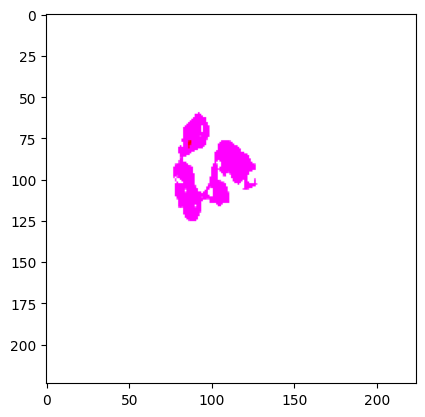

In [ ]:
plt.imshow(img[0])

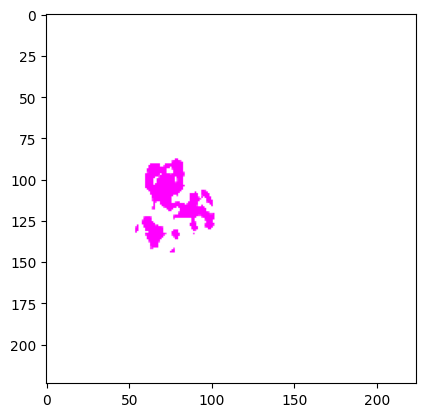

In [ ]:
plt.imshow(img[15])

In [ ]:
label[0]

array([0., 0., 0., 1.], dtype=float32)

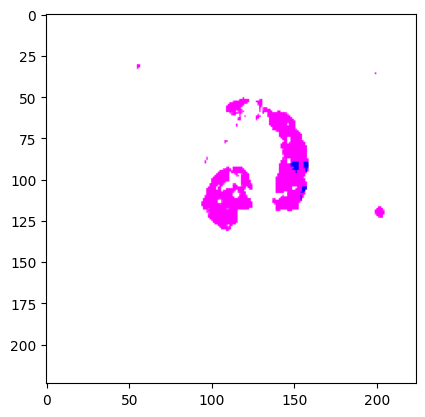

In [ ]:
plt.imshow(cv2.cvtColor(img[1],cv2.COLOR_BGR2RGB))

In [ ]:
label[1]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
model_cnn=tensorflow.keras.models.Sequential()
for layer in model.layers:
    model_cnn.add(layer)

In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
label.shape

(32, 4)

In [ ]:
model_cnn.add(tensorflow.keras.layers.Flatten())
model_cnn.add(tensorflow.keras.layers.Dense(4096,activation="relu"))
model_cnn.add(tensorflow.keras.layers.Dense(4096,activation="relu"))
model_cnn.add(tensorflow.keras.layers.Dense(label.shape[1],activation="softmax"))

In [ ]:
for layer in model_cnn.layers[:-3]:
    layer.trainable=False

In [ ]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 119,562,244 (456.09 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model_cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model_cnn.fit(
    train_batches,
    epochs=25,
    verbose=2
)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 - 20s - 7s/step - accuracy: 0.4507 - loss: 329.3299
Epoch 2/25
3/3 - 1s - 171ms/step - accuracy: 0.1831 - loss: 141.5030
Epoch 3/25
3/3 - 0s - 158ms/step - accuracy: 0.7746 - loss: 9.2946
Epoch 4/25
3/3 - 0s - 155ms/step - accuracy: 0.7183 - loss: 1.9986
Epoch 5/25
3/3 - 1s - 179ms/step - accuracy: 0.9296 - loss: 1.6055
Epoch 6/25
3/3 - 1s - 187ms/step - accuracy: 0.9577 - loss: 0.8072
Epoch 7/25
3/3 - 1s - 208ms/step - accuracy: 0.9859 - loss: 0.0342
Epoch 8/25
3/3 - 1s - 198ms/step - accuracy: 1.0000 - loss: 3.2487e-06
Epoch 9/25
3/3 - 1s - 198ms/step - accuracy: 0.9859 - loss: 0.0285
Epoch 10/25
3/3 - 1s - 169ms/step - accuracy: 1.0000 - loss: 9.9853e-06
Epoch 11/25
3/3 - 0s - 152ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 12/25
3/3 - 0s - 164ms/step - accuracy: 1.0000 - loss: 3.2229e-05
Epoch 13/25
3/3 - 0s - 165ms/step - accuracy: 1.0000 - loss: 2.6864e-08
Epoch 14/25
3/3 - 0s - 156ms/step - accuracy: 1.0000 - loss: 6.7160e-09
Epoch 15/25
3/3 - 1s - 170ms/step - accuracy: 

In [ ]:
model_cnn.evaluate(train_batches,verbose=0)

[2.3506038004939e-08, 1.0]

In [ ]:
model_cnn.save("/content/working/model.h5")

In [ ]:
model_load=tensorflow.keras.models.load_model("/content/working/model.h5")

In [ ]:
def predict_image(path_img):
    img=cv2.imread(path_img)
    img_size=cv2.resize(img,dsize=(224,224))
    img_new=preprocess_input(img_size)
    pred=model_cnn.predict(np.expand_dims(img_new,0)).round(2)
    class_id=np.argmax(pred[0])
    return class_id
predict_image("/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_3_625.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


np.int64(0)

In [ ]:
predict_image("/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/_2_6981.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


np.int64(1)

In [ ]:
predict_image("/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/_2_4392.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


np.int64(2)

In [ ]:
predict_image("/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/_1_4511.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


np.int64(2)

In [ ]:
predict_image("/content/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/_11_1721.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


np.int64(3)

In [ ]:
predict_image("/content/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE/_0_1072.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


np.int64(3)